# Анализ оттока клиентов банка

# Оглавление

**Для удобства можете воспользоваться ссылками для перемещения на основные части проекта**

1. [Обзор данных](#start)
2. [Предобработка данных](#preprocessing)

    * [Работа с названиями столбцов](#name)
    * [Обработка пропущенных значений](#null)
    * [Обработка дубликатов](#duplicates)
    * [Работа с типами данных](#type)
    * [Кодирование](#cod)
    
    
3. [Исследовательский анализ данных](#data_science)

    * [Анализ распределений](#distributions)
    * [Анализ портрета клиентов](#portrait)
    * [Корреляционный анализ](#correlation_analysis)
    * [Выводы из исследовательского анализа](#conclusions)
    

4. [Сегментация](#seg)
5. [Статистический анализ данных](#stat)
6. [Выводы и рекомендации](#recomendation)
7. [Подготовка презентации и дашборда](#powerpoint)

# Описание проекта

**Цель исследования:**

Необходимо выделить высокоотточные сегменты клиентов, чтобы они покрывали максимум проблемных зон и дать их описание и рекоммендации заказчику по мерам снижения отточности.

**Задачи исследования:**

Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка:
- Провести исследовательский анализ данных, определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравнить портреты типичных клиентов, которые склонны и не склонны уходить из банка);
- Сформулирувать и проверьте статистические гипотезы;
- Объединяя признаки отточности, сформировать сегменты, выбрать из них лучшие и дать рекомендации.


# Описание данных

Датасет содержит данные о клиентах банка, банк базируется в
Ярославле и областных городах: Ростов Великий и Рыбинск.

**Датасет:** bank_scrooge.csv

- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- Objects — количество объектов в собственности / equity — количество баллов собственности
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- Loyalty / last_activity — активный клиент,
- estimated_salary — заработная плата клиента,
- Churn — ушёл или нет.

# План работы

### 1. Подготовка к исследованию
- Загрузка данных;
- Изучение общей информации.

### 2. Предобработка данных
- Работа с названиями столбцов (приведение названий столбцов к змеиному регистру);
- Работа с типами данных (изменение типов данных, при необходимости);
- Работа с пропусками (анализ природы пропусков и принятие решения о дальнейшей работе с ними (Удалить/Оставить/Заменить));
- Работа с дубликатами (анализ природы дубликатов и принятие решения о дальнейшей работе с ними (Удалить/Оставить);
- Кодирование (для использования в анализе корреляций).

### 3. Исследовательский анализ данных
- Анализ распределения признаков;
- Анализ портретов клиентов и их сравнение (сравние портретов типичных клиентов, которые склонны и не склонны уходить из банка);
- Корреляционный анализ;
- Формулирование выводов.

### 4. Сегментация
Выделение сегментов по нескольким отточным признакам, выбор лучших.

### 5. Статистический анализ данных
Проверка статистических гипотез:

- Гипотеза 1: Различие дохода между теми клиентами, которые ушли и теми, которые остались.
- Гипотеза 2: Будет сформулирована в процессе работы над проектом.

### 6. Выводы и рекомендации 
Краткая сводка о проделанной работе, конкретные рекомендации для заказчика.

### 7. Подготовка презентации и дашборда

<a id="start"></a> 

# Обзор данных

In [1]:
#импорт библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axis import Axis  
import matplotlib.ticker as ticker
import datetime as dt
import math as mth
from scipy.stats import ttest_ind
import scipy.stats as st
from datetime import datetime, timedelta

!pip install phik
from phik import report
from phik.report import plot_correlation_matrix

In [2]:
#установка цветовой палитры

sns.set_palette('Set2')

In [3]:
#чтение файла и сохранение его в переменную data

try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

Ознакомимся с данными

In [4]:
#просмотр первых 5ти строк 

data.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Исследуем общую информацию

In [5]:
#просмотр основной информации о датасете 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Посмотрим распределение

In [6]:
#просмотр основной информации о датасете 

data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Теперь перед глазами краткая сводка о наших данных. Можно посмотреть, какие есть колонки, какой тип данных в них содержится и где есть пропуски.

Oбщая гистограмма для всех числовых столбцов таблицы:

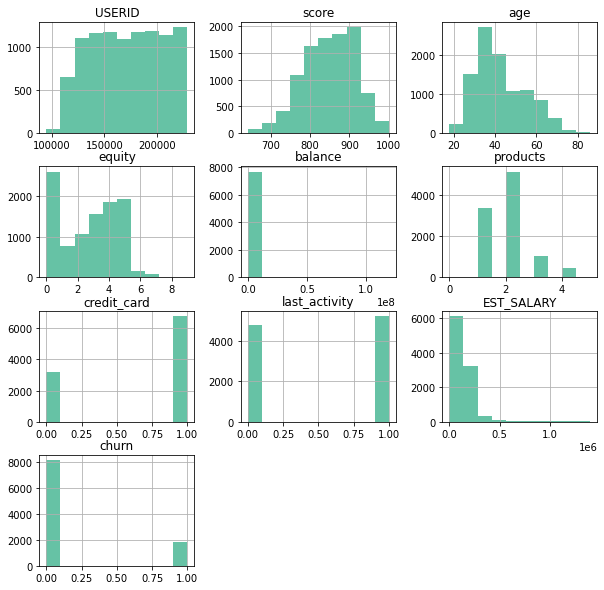

In [7]:
#построение гистограмм для числовых столбцов

data.hist(figsize=(10, 10));

In [8]:
#проверка наличия пропусков

data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Выводы из первичного анализа данных:

* Всего в файле с данными 10000 строк;
* Следует заменить названия столбцов;
* Есть несоответствия в типах данных;
* Обнаружены пропуски в столбцах "age" и "balance".

<a id="preprocessing"></a> 

# Предобработка данных

Исследуем данные в различных аспектах:

- Названия столбцов
- Пропущенные значения
- Дубликаты и аномалии
- Типы данных

<a id="name"></a> 

### Работа с названиями столбцов

Для начала приведем название столбцов к правильному формату

In [9]:
#приведение названий столбцов к нижнему регистру

data.columns = data.columns.str.lower()

In [10]:
#переименование некоторых столбцов

data.rename(columns={'userid':'user_id'}, inplace=True)

In [11]:
#проверка после переименования

data.head(2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0


Теперь названия столбцов в правильном формате

<a id="null"></a> 

### Обработка пропущенных значений

In [12]:
#проверка наличия пропусков

data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Визуализируем наши пропуски в виде диаграммы

In [13]:
def pass_value_barh(data):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', legend = False, figsize = (8,3))
            .set_title('Пропущенные значения')
        );    
    except:
        print('Пропусков нет')

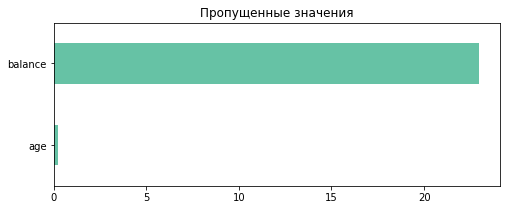

In [14]:
pass_value_barh(data)

В данных имеются пропуски в следующих столбцах:

* age — возраст;
* balance — баланс на счёте.

Пропуски в столбце "age" можно просто удалить, их незначительное количество и на последующем анализе это не скажется.

Пропуски в столбце "balance" будем исследовать.

In [15]:
#удаление пропусков в столбце age

data.dropna(subset=['age'], inplace=True)
data['age'].isna().sum() 

0

Исследуем пропуски в столбце balance

In [16]:
data[data['balance'].isna()].head(30)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
21,177415,896.0,Рыбинск,Ж,47.0,0,NaN,1,0,0,225060.35,0
30,155730,946.0,Ярославль,Ж,47.0,0,NaN,2,1,1,660015.85,0
34,205226,944.0,Ярославль,М,35.0,0,NaN,2,1,1,239843.39,0
39,173175,924.0,Рыбинск,Ж,51.0,0,NaN,1,1,1,248844.47,0
43,228585,956.0,Ростов,М,41.0,0,NaN,1,1,0,115117.10,0


Скорее всего пользователи, у которых пропущено поле "balance" это новые пользователи, которые еще не успели ничего сделать со своим счетом, так как только начали обслуживаться в нашем банке, у них, как правило, всего 0-2 продукта, они не расторгли договор и количество баллов собственности у них 0-1. Пропуски в данном случае нельзя считать технической ошибкой или загулшкой. Оставим их, как есть.

<a id="duplicates"></a> 

### Обработка дубликатов

Проверим данные на наличие дубликатов и аномалий, для этого рассмотрим уникальные значения в данных

In [17]:
#проверка явных дубликатов

data.duplicated().sum()

0


Явные дубликаты не обнаружены

Проверим наличие неявных дубликатов и аномалий

In [18]:
#просмотр уникальных значений в столбце 'city'

data['city'].sort_values().unique()

array(['Ростов', 'Рыбинск', 'Ярославль'], dtype=object)

In [19]:
#просмотр уникальных значений в столбце 'gender'

data['gender'].sort_values().unique()

array(['Ж', 'М'], dtype=object)

In [20]:
#проверка неявных дубликатов

data[data.duplicated(subset=['user_id', 'age'], keep=False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1359,211130,833.0,Ярославль,М,55.0,3,1231184.90,4,0,1,187758.38,1
3274,155765,863.0,Ярославль,М,30.0,5,1036114.50,5,1,1,150744.50,1
3564,163207,853.0,Рыбинск,М,42.0,4,543839.62,1,1,1,105281.97,1
3817,211130,918.0,Рыбинск,Ж,55.0,0,NaN,2,1,1,244202.04,0
5197,155765,923.0,Рыбинск,М,30.0,0,NaN,1,1,1,120296.60,0
5252,148826,895.0,Ярославль,М,32.0,5,1470273.14,2,0,0,118058.52,1
6786,163207,838.0,Ярославль,Ж,42.0,4,652776.60,2,1,1,97545.36,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8364,148826,909.0,Рыбинск,Ж,32.0,0,NaN,3,1,0,28843.54,0
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


В нашем датасете присутствуют пользователи с одинаковыми айдишниками, но это вовсе не дубликаты, пользователи имеют разный пол/возраст/проживают в разных городах. Скорее всего тут дело в технической ошибке, люди, получившие одинаковые айдишники имеют общие параметры, возраст всегда совпадает.

<a id="type"></a> 

### Работа с типами данных

Преобразуем данные в нужные типы

In [21]:
#основная информация о нашем датасете

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


In [22]:
data.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0


Изменим тип данных в столбцах:

- "age" — c float64 на int64 (все таки возраст целое число);
- "score" — c float64 на int64 (рейтинг приведен в целых числах от 0-1000).

In [23]:
#изменение типа данных

data['age'] = data['age'].astype('Int64')

In [24]:
#проверка данных после изменения типа

data['age'].unique()

<IntegerArray>
[25, 37, 30, 51, 34, 56, 39, 38, 54, 67, 52, 41, 31, 28, 35, 42, 45, 53, 40,
 43, 47, 48, 61, 62, 36, 26, 27, 60, 72, 50, 46, 55, 58, 71, 44, 49, 33, 32,
 66, 29, 68, 73, 69, 59, 21, 65, 57, 63, 80, 24, 70, 77, 64, 23, 20, 18, 19,
 78, 74, 76, 22, 75, 83, 82, 81, 84, 79, 86]
Length: 68, dtype: Int64

In [25]:
#изменение типа данных

data['score'] = data['score'].astype('Int64')

In [26]:
#проверка данных после изменения типа

data['score'].unique()

<IntegerArray>
[850, 861, 892, 866, 730, 856, 807, 825, 923, 906,
 ...
 654, 680, 998, 660, 670, 656, 665, 662, 704, 995]
Length: 348, dtype: Int64

На этом работа с типами данных заканчивается

<a id="cod"></a> 

### Кодирование

Для дальнейшей работы добавим новые столбцы 'gender_int' и 'city_ростов', 'city_рыбинск', 'city_ярославль' с изменением значений 'М' на 1, 'Ж' на 0.

In [27]:
#создание столбца "gender_int"

data['gender_int'] = data['gender'].map({'М':1, 'Ж':0})

In [28]:
#создание новых столбцов для разных городов

data = pd.get_dummies(data, columns=['city'])

In [29]:
data.columns = data.columns.str.lower()

In [30]:
#проверка наличия новых столбцов

data.head(5)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_int,city_ростов,city_рыбинск,city_ярославль
0,183012,850,Ж,25,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,146556,861,Ж,37,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,120722,892,Ж,30,0,NaN,1,1,1,107683.34,0,0,0,1,0
3,225363,866,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,0,1
4,157978,730,М,34,5,174.00,1,1,0,67353.16,1,1,0,0,1


На данном этапе предобработка данных завершается

**В ходе предобработки данных:**

- Названия столбцов приведены к правильному формату;
- Проверено наличие пропусков и удалены пропуски в столбце "age";
- Проверено наличие явных и неявных дубликатов;
- Заменены типы данных в стобцах: age, score;
- Проведено кодирование столбцов 'gender' и 'city'.

<a id="data_science"></a> 

# Исследовательский анализ данных

<a id="distributions"></a> 

### Анализ распределений

Для начала посмотрим на распределения категориальных данных

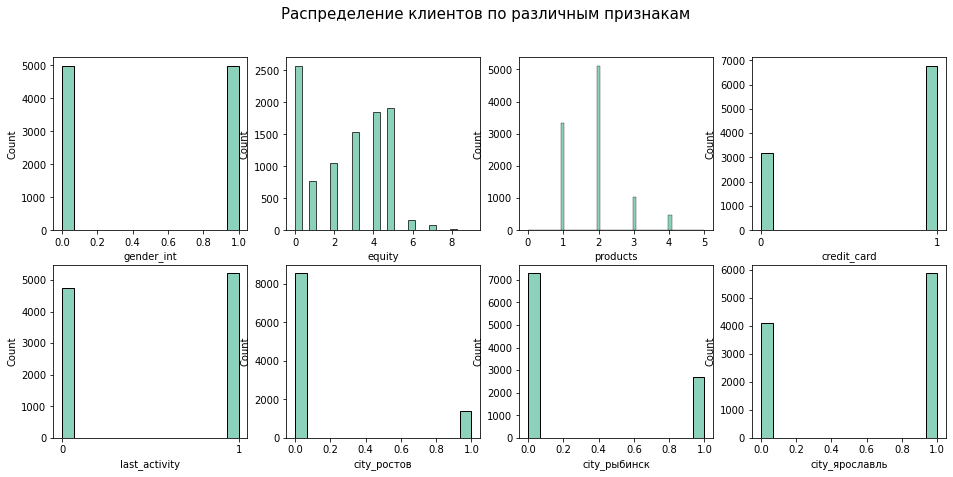

In [31]:
#построение графика распределения клиентов

values = ['gender_int', 'equity', 'products', 'credit_card', 'last_activity', 'city_ростов', 'city_рыбинск', 'city_ярославль']

fig, ax = plt.subplots(2, 4)
fig.set_size_inches(16, 7)
fig.suptitle('Распределение клиентов по различным признакам', fontsize=15)

for value, subplot in zip(values, ax.flatten()):
    if value in ['gender', 'credit_card', 'last_activity', 'city_int']:
        subplot.set_xticks([0,1])
    sns.histplot(data=data, x=value, ax=subplot);

**Выводы:**

- Соотношение мужчин и женщин в выборке примерно одинаковое;
- Наибольшее количество клиентов имеют 0 баллов собственности, второе и третье место занимают 4 и 5 баллов соответственно;
- Большинство клиентов банка оформили два продукта, на втором месте клиенты с одним продуктом;
- Клиентов, оформивших кредитную карту больше больше;
- Количество активных клиентов чуть больше;
- Большая часть клиентов из Ярославля;
- Меньше всего людей из Ростова.

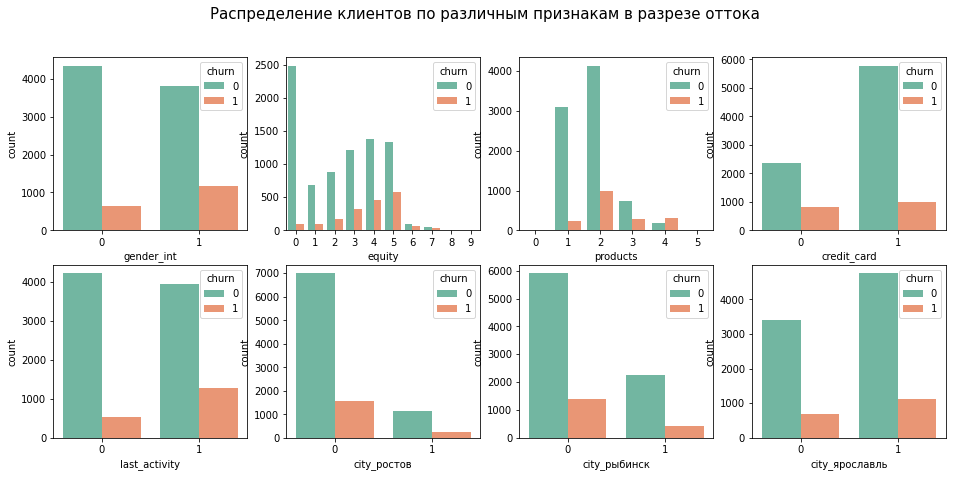

In [32]:
#построение графика распределения клиентов в разрезе оттока

fig, ax = plt.subplots(2, 4)
fig.set_size_inches(16, 7)
fig.suptitle('Распределение клиентов по различным признакам в разрезе оттока', fontsize=15)

for value, subplot in zip(values, ax.flatten()):
    sns.countplot(x=value, data=data,  hue='churn', ax=subplot);

**Выводы:**

К расторжению договора с банком больше склонен следующий тип клиентов:
- мужчина;
- имеет 5 баллов собственности;
- имеет 2 продукта;
- имеет кредитную карту;
- является активным клиентом;
- из города Ярославль.

А теперь посмотрим на количественные данные

Построим графики распределения числовых столбцов, чтобы посмотреть для каких признаков характерен отток клиентов

**Признак - кредитный скоринг**

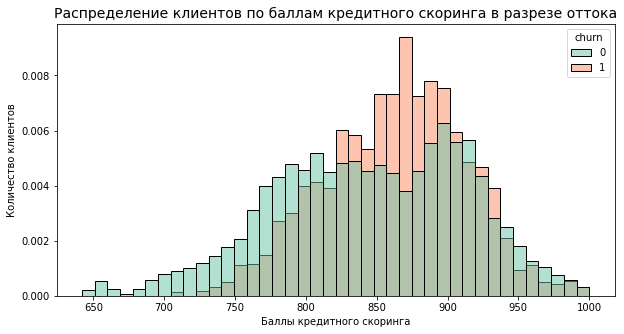

In [33]:
#построение графика распределения клиентов по баллам кредитного скоринга в разрезе оттока

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=data, hue='churn', x='score', stat='density', common_norm=False)
plt.title('Распределение клиентов по баллам кредитного скоринга в разрезе оттока', fontsize = 14)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Количество клиентов')
plt.show;

Один из признаков отточности клиентов - баллы кредитного скоринга от 840 до 910

**Признак - возраст**

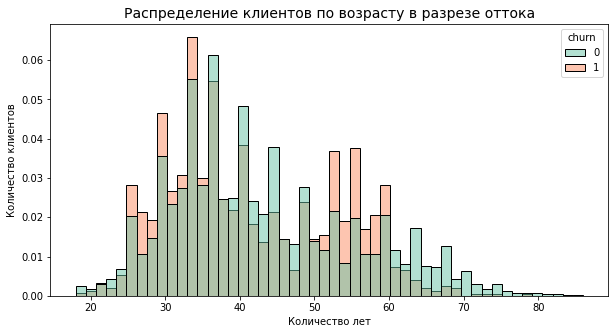

In [34]:
#построение графика распределения клиентов по возрасту в разрезе оттока

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=data, hue='churn', x='age', stat='density', common_norm=False, bins=50)
plt.title('Распределение клиентов по возрасту в разрезе оттока', fontsize = 14)
plt.xlabel('Количество лет')
plt.ylabel('Количество клиентов')
plt.show;

Еще один признак отточности клиентов - возраст от 25 до 35 лет и от 50 до 60 лет

**Признак - баланас клиента**

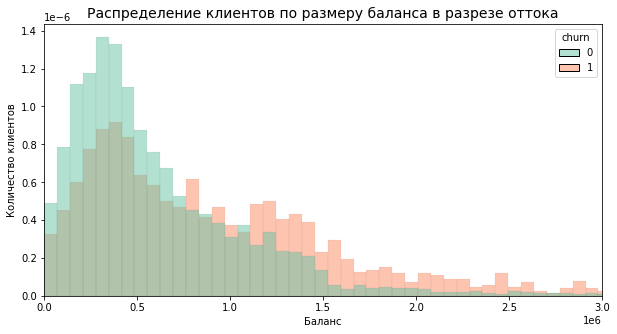

In [35]:
#построение графика распределения клиентов по балансу в разрезе оттока

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=data, hue='churn', x='balance', stat='density', common_norm=False)
plt.title('Распределение клиентов по размеру баланса в разрезе оттока', fontsize = 14)
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.xlim(0, 3000000)
plt.show;

Следующий признаков - балансом выше 800 тыс

**Признак - заработная плата**

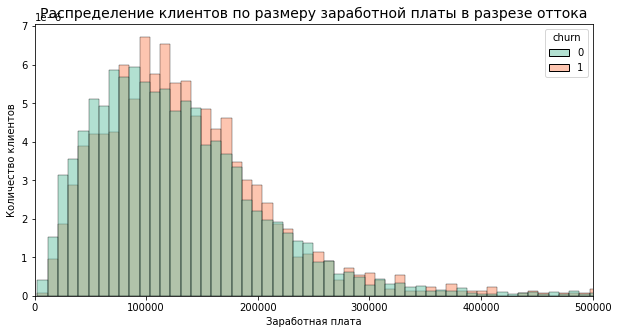

In [36]:
#построение графика распределения клиентов по зарплате в разрезе оттока

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=data, hue='churn', x='est_salary', stat='density', common_norm=False)
plt.title('Распределение клиентов по размеру заработной платы в разрезе оттока', fontsize = 14)
plt.xlabel('Заработная плата')
plt.ylabel('Количество клиентов')
plt.xlim(0, 500000)
plt.show;

И последний признак - заработной плата выше 90 тыс

**Выводы:**

- Наибольшую вероятность оттока имеют клиенты с:
  * баллами кредитного скоринга 840-910;
  * возрастом от 25 до 35 лет и от 50 до 60 лет;
  * балансом выше 800 тыс;
  * заработной платой выше 90 тыс.
- Распределения баланса и заработной платы имеют хвост в правой части, который состоит из клиентов с высокими значениями баланса и зарплаты соотвественно, наиболее обеспеченные клиенты банка.

<a id="portrait"></a> 

### Анализ портретов клиентов

Познакомимся с отточными клиентами поближе:)

Для начала удалим столбец "user_id", так как не является информативным

In [37]:
#удаление столбца "user_id"

data = data.drop(columns=['user_id'])

In [38]:
#рассчет средних значений признаков для отточных и неотточных клиентов по средним значениям

data.groupby('churn').agg('mean')

,score,age,equity,balance,products,credit_card,last_activity,est_salary,gender_int,city_ростов,city_рыбинск,city_ярославль
churn,,,,,,,,,,,,
0,845.396199,43.020846,2.378296,7.330316e+05,1.758921,0.708890,0.482894,147674.637881,0.466953,0.141140,0.275414,0.583446
1,863.416163,41.450247,3.763057,1.134458e+06,2.376031,0.551402,0.702034,148289.702221,0.650357,0.145684,0.240242,0.614074


Посмотрим на значения зарплаты и баланса по медианным значениям, так как ранее мы видели большие хвосты в сторону обеспеченных людей

In [39]:
#расчет средних значений признаков для отточных и неотточных клиентов по медианным значениям

data.groupby('churn').agg('median')[['est_salary', 'balance']]

,est_salary,balance
churn,,
0,118227.60,475410.09
1,125395.22,783908.90


Портреты типичных клиентов, которые склонны и не склонны уходить из банка:

- Среднестатистический пользователь, имеющий маленький процент вероятности оттока - женщина, имеющая баллы скоринга 845, 43 года, оценка собственности 2, баланс 475410, 2 продукта, в том числе, кредитная карта, не является активным пользователем и имеет зарплату в 118 227.
- Среднестатистический пользователь имеющий большой процент вероятности оттока - мужчина, имеющий баллы скоринга 863, 41 год, оценка собственности 4, баланс 783908, 2 продукта, в том числе, кредитная карта, является активным пользователем и имеет зарплату в 125 395. 

<a id="correlation_analysis"></a> 

### Корреляционные анализ

Перейдем к корреляционному анализу

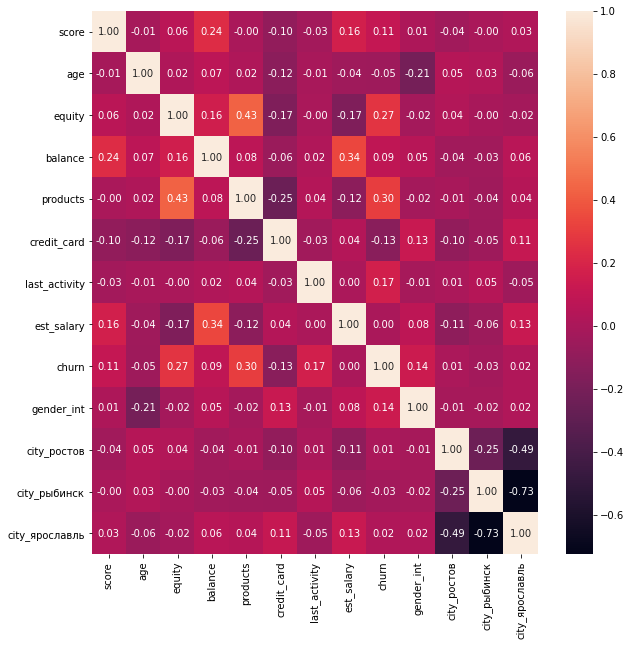

In [40]:
#построение матрицы коэффициентов корреляций

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f');

Отдельно реализуем корреляцию phik по категориальным данным, так как для них корреляция Пирсона не подходит

In [42]:
phik_overview = data.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'gender_int', 'city_ростов', 'city_рыбинск', 'city_ярославль']


,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_int,city_ростов,city_рыбинск,city_ярославль
score,1.00,0.07,0.04,0.53,0.17,0.31,0.21,0.05,0.40,0.23,0.07,0.09,0.03,0.08
gender,0.07,1.00,0.29,0.06,0.05,0.12,0.20,0.01,0.14,0.22,1.00,0.02,0.02,0.03
age,0.04,0.29,1.00,0.04,0.02,0.13,0.16,0.09,0.36,0.18,0.29,0.07,0.06,0.10
equity,0.53,0.06,0.04,1.00,0.00,0.44,0.22,0.05,0.29,0.35,0.06,0.06,0.00,0.06
balance,0.17,0.05,0.02,0.00,1.00,0.00,0.00,0.00,0.37,0.02,0.05,0.00,0.02,0.05
products,0.31,0.12,0.13,0.44,0.00,1.00,0.46,0.19,0.16,0.44,0.12,0.08,0.15,0.18
credit_card,0.21,0.20,0.16,0.22,0.00,0.46,1.00,0.05,0.04,0.20,0.20,0.15,0.08,0.18
last_activity,0.05,0.01,0.09,0.05,0.00,0.19,0.05,1.00,0.04,0.26,0.01,0.00,0.07,0.07
est_salary,0.40,0.14,0.36,0.29,0.37,0.16,0.04,0.04,1.00,0.05,0.14,0.14,0.10,0.18
churn,0.23,0.22,0.18,0.35,0.02,0.44,0.20,0.26,0.05,1.00,0.22,0.00,0.04,0.03


In [43]:
interval_cols = ['age','score', 'balance', 'est_salary']
phik_overview = data.phik_matrix(interval_cols=interval_cols)

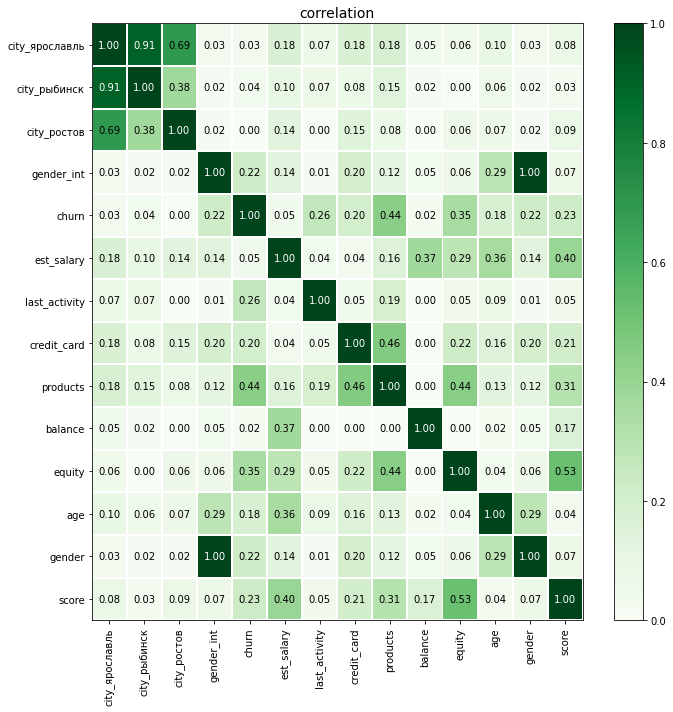

In [44]:
plot_correlation_matrix(phik_overview.values,
x_labels=phik_overview.columns,
y_labels=phik_overview.index,
vmin=0, vmax=1, color_map="Greens",
fontsize_factor=1,
figsize=(10, 10))
plt.tight_layout()

Наблюдаем взаимосвязь между (0.44-0.53):
- баллами кредитного скоринга и количеством баллов собственности;
- количеством продуктов и оценкой собственности;
- количеством продуктов и оттоком;
- количеством продуктов и владением кредитной картой;

Небольшая взаимосвязь (0.37) имеется между заработной платой клиента и его балансом.

/opt/conda/lib/python3.9/site-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


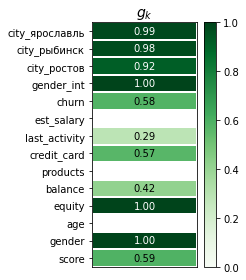

In [45]:
global_correlation, global_labels = data.global_phik(interval_cols=interval_cols)

plot_correlation_matrix(global_correlation,
x_labels=[''], y_labels=global_labels,
vmin=0, vmax=1, figsize=(3.5,4),
color_map="Greens", title=r"$g_k$",
fontsize_factor=1)
plt.tight_layout()

Наибольшее влияние на отточность оказывают баллы кредитного скоринга и владение кредитной картой

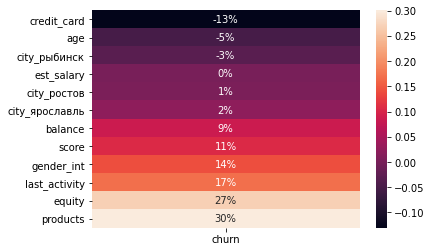

In [46]:
sns.heatmap(
    data.corr().loc[:,['churn']]
    .drop('churn').sort_values('churn'), 
    annot=True, fmt='.0%');

<a id="conclusions"></a> 

### Выводы из исследовательского анализа

**Основные выводы:**

- Соотношение мужчин и женщин в выборке примерно одинаковое;
- Наибольшее количество клиентов имеют 0 баллов собственности;
- Большинство клиентов банка оформили два продукта;
- Клиентов, оформивших кредитную карту больше;
- Наибольшее количество клиентов из Ярославля, наименьшее количество людей из Ростова;
- К расторжению договора с банком больше склонен следующий тип клиентов: мужчина, 5 баллов собственности, 2 продукта, имеет кредитную карту, активный клиент, скорее всего из Ярославля;
- Наибольшую вероятность оттока имеют клиенты с: баллами кредитного скоринга 840-910; возрастом от 25 до 35 лет и от 50 до 60 лет; балансом выше 800 тыс; зарплатой выше 90 тыс.
- Портреты типичных клиентов, которые склонны и не склонны уходить из банка:
  - Среднестатистический пользователь, имеющий маленький процент вероятности оттока - женщина, имеющая баллы скоринга 845, 43 года, оценка собственности 2, баланс 475410, 2 продукта, в том числе, кредитная карта, не является активным пользователем и имеет зарплату в 118 227.
  - Среднестатистический пользователь имеющий большой процент вероятности оттока - мужчина, имеющий баллы скоринга 863, 41 год, оценка собственности 4, баланс 783908, 2 продукта, в том числе, кредитная карта, является активным пользователем и имеет зарплату в 125 395.
- Есть взаимосвязь между баллами кредитного скоринга и количеством баллов собственности, количеством продуктов и владением кредитной картой;
- Наибольшее влияние на отточность оказывают баллы кредитного скоринга и владение кредитной картой.

<a id="seg"></a> 

# Сегментация

Перейдем к сегментации, объединяя по 2 признака отточности, сформируем высокоотточные сегменты, из них выберем наиболее многочисленные

**1 сегмент - Клиенты, имеющие баллы кредитного скоринга 840-910 и баланс выше 800 тыс**

Количество активных клиентов: 1131
Из них являются отточными: 479


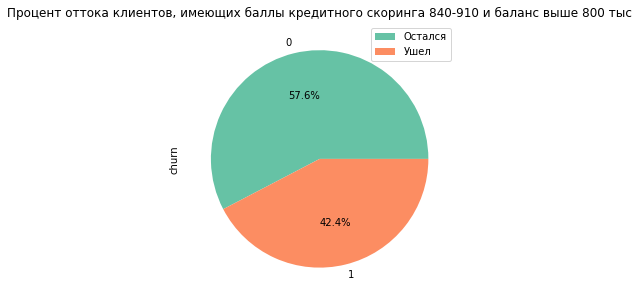

In [47]:
data.query('score >= 840 and score <= 910 and balance >= 800000').groupby('churn')['churn'].count().plot(
    kind='pie',
    figsize=(5,5),
    y='churn',
    autopct='%1.1f%%')

plt.legend(labels = ['Остался', 'Ушел'])

plt.title('Процент оттока клиентов, имеющих баллы кредитного скоринга 840-910 и баланс выше 800 тыс');

print(f'Количество активных клиентов: {len(data.query("score >= 840 and score <= 910 and balance >= 800000"))}')
print(f'Из них являются отточными: {len(data.query("score >= 840 and score <= 910 and balance >= 800000 and churn==1"))}')

Слишком маленький сегмент

**2 сегмент - активные клиенты, имеющие баллы кредитного скоринга 840-910**

Количество активных клиентов: 1887
Из них являются отточными: 575


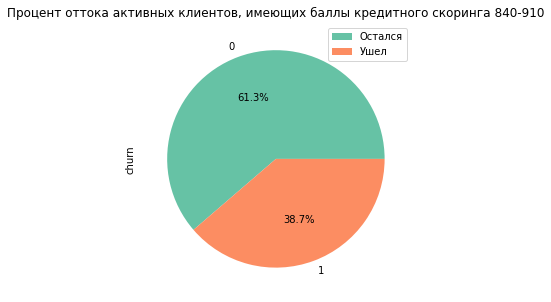

In [48]:
data.query('score >= 840 and score <= 910 and last_activity == 1').groupby('churn')['churn'].count().plot(
    kind='pie',
    figsize=(5,5),
    y='churn',
    autopct='%1.1f%%')

plt.legend(labels = ['Остался', 'Ушел'])

plt.title('Процент оттока активных клиентов, имеющих баллы кредитного скоринга 840-910');

print(f'Количество активных клиентов: {len(data.query("score >= 840 and score <= 910 and last_activity == 1"))}')
print(f'Из них являются отточными: {len(data.query("score >= 850 and score <= 900 and last_activity==1 and churn==1"))}')

**3 сегмент - клиенты мужского пола, имеющие более 2х продуктов**

Количество активных клиентов: 3462
Из них являются отточными: 1122


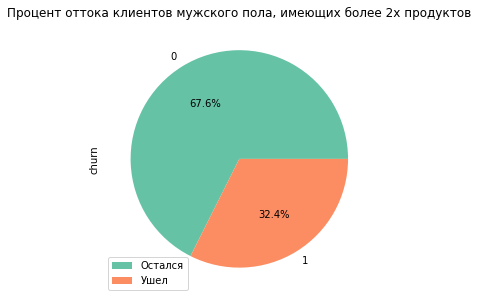

In [49]:
data.query('products >= 2 and last_activity == 1').groupby('churn')['churn'].count().plot(
    kind='pie',
    figsize=(5,5),
    y='churn',
    autopct='%1.1f%%')

plt.legend(labels = ['Остался', 'Ушел'])

plt.title('Процент оттока клиентов мужского пола, имеющих более 2х продуктов');

print(f'Количество активных клиентов: {len(data.query("products >= 2 and last_activity == 1"))}')
print(f'Из них являются отточными: {len(data.query("products >= 2 and last_activity == 1 and churn==1"))}')

**4 сегмент - клиенты, не имеющие кредитную карту и оценку собственности 4 и выше**

Количество активных клиентов: 1586
Из них являются отточными: 577


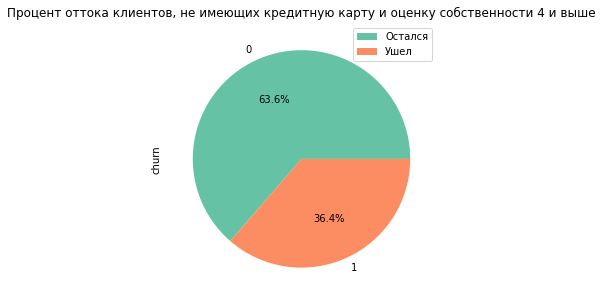

In [50]:
data.query('equity >= 4 and credit_card==0').groupby('churn')['churn'].count().plot(
    kind='pie',
    figsize=(5,5),
    y='churn',
    autopct='%1.1f%%')

plt.legend(labels = ['Остался', 'Ушел'])

plt.title('Процент оттока клиентов, не имеющих кредитную карту и оценку собственности 4 и выше');

print(f'Количество активных клиентов: {len(data.query("equity >= 4 and credit_card==0"))}')
print(f'Из них являются отточными: {len(data.query("equity >= 4 and credit_card==0 and churn==1"))}')

**5 сегмент - клиенты, имеющие баллы кредитного скоринга 840-910 и баланс выше 800 тыс**

Количество активных клиентов: 1428
Из них являются отточными: 483


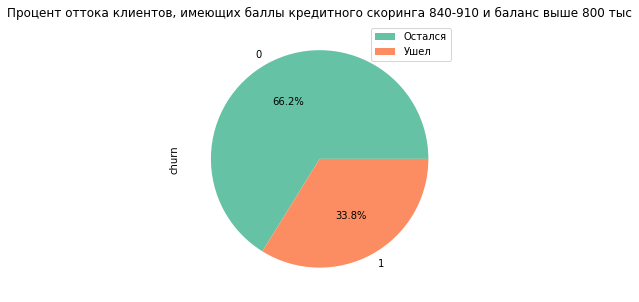

In [51]:
data.query('score >= 840 and score <= 910 and credit_card==0').groupby('churn')['churn'].count().plot(
    kind='pie',
    figsize=(5,5),
    y='churn',
    autopct='%1.1f%%')

plt.legend(labels = ['Остался', 'Ушел'])

plt.title('Процент оттока клиентов, имеющих баллы кредитного скоринга 840-910 и баланс выше 800 тыс');

print(f'Количество активных клиентов: {len(data.query("score >= 840 and score <= 910 and credit_card==0"))}')
print(f'Из них являются отточными: {len(data.query("score >= 840 and score <= 910 and credit_card==0 and churn==1"))}')

Слишком маленький сегмент

Таким образом выделены 3 наиболее многочисленные отточные сегменты клиентов на основе признаков, имеющих наибольшее влияние на зависимую переменнную.

Сюда вошли такие сегменты, как:
- клиенты, не имеющие кредитную карту и оценку собственности 4 и выше;
- активные клиенты, имеющие баллы кредитного скоринга 840-910;
- клиенты мужского пола, имеющие более 2х продуктов.

<a id="stat"></a> 

# Статистический анализ данных

**Гипотеза №1**

Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформулируем гипотезы:

H_0: Средняя заработная плата отточных клиентов равна средней заработной плате неотточных клиентов

Н_1: Средняя заработная плата отточных клиентов не равна средней заработной плате неотточных клиентов

In [52]:
results = st.ttest_ind(
    data.query('churn == 1')['est_salary'], 
    data.query('churn == 0')['est_salary'])

alpha = 0.05 #критический уровень статистической значимости

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8647861589211189
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть мы не можем => средняя заработная плата у отточных и неотточных клиентов равна.

**Гипотеза №2**

Сформулируем вторую гипотезу: 

Проверим гипотезу различия количества баллов собственности между теми клиентами, которые ушли и теми, которые остались.

H_0: Среднее количество баллов собственности у отточных клиентов равно среднему количеству баллов собственности у неотточных клиентов

Н_1: Среднее количество баллов собственности у отточных клиентов не равно среднему количеству баллов собственности у неотточных клиентов

In [53]:
results = st.ttest_ind(
    data.query('churn == 1')['equity'], 
    data.query('churn == 0')['equity'])

alpha = 0.05 #критический уровень статистической значимости

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.872142636918415e-166
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу => среднее количество баллов собственности у отточных и неотточных клиентов различается.

**Гипотеза №3**

Проверим еще одну гипотезу

Проверим гипотезу различия количества продуктов между теми клиентами, которые ушли и теми, которые остались.

H_0: Среднее количество продуктов у отточных клиентов равно среднему количеству продуктов у неотточных клиентов

Н_1: Среднее количество продуктов у отточных клиентов не равно среднему количеству продуктов у неотточных клиентов

In [54]:
results = st.ttest_ind(
    data.query('churn == 1')['products'], 
    data.query('churn == 0')['products'])

alpha = 0.05 #критический уровень статистической значимости

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.0765646697701624e-207
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу => среднее количество продуктов не равно у отточных и неотточных клиентов.

<a id="recomendation"></a> 

# Выводы

**В ходе исследования мы:**

1) Провели предобработку данных:
   - Изучили общую информацию о полученном датафрейме;
   - Обработали пропущенные значения;
   - Проверили наличие дубликатов и провели исследование их природы;
   - Рассмотрели типы данных в каждом столбце, изменили тип данных там, где это было необходимо;
   - Изменили названия некоторых столбцов;
   - Проверили кодирование данных.

2) Выполнили исследовательский анализ данных:
   - Провели анализ распределений;
   - Проверили анализ портретов клиентов;
   - Выполнили корреляционные анализ;
   - Сделали основные выводы из исследовательского анализа.

3) Провели сегментацию данные

4) Реализовали статистический анализ данных

**Основные выводы:**

- К расторжению договора с банком больше склонен следующий тип клиентов: мужчина, 5 баллов собственности, 2 продукта, имеет кредитную карту, активный клиент, из города Ярославль;
- Наибольшую вероятность оттока имеют клиенты с: баллами кредитного скоринга 840-910; возрастом от 25 до 35 лет и от 50 до 60 лет; балансом выше 800 тыс; зарплатой выше 90 тыс;
- Портреты типичных клиентов, которые склонны и не склонны уходить из банка:
  - Среднестатистический пользователь, имеющий маленький процент вероятности оттока - женщина, имеющая баллы скоринга 845, 43 года, оценка собственности 2, баланс 475410, 2 продукта, в том числе, кредитная карта, не является активным пользователем и имеет зарплату в 118 227.
  - Среднестатистический пользователь имеющий большой процент вероятности оттока - мужчина, имеющий баллы скоринга 863, 41 год, оценка собственности 4, баланс 783908, 2 продукта, в том числе, кредитная карта, является активным пользователем и имеет зарплату в 125 395.
- Наибольшее влияние на отточность оказывают количество продуктов и оценка собственности клиента.
- 3 наиболее отточных сегмента клиентов на основе признаков, имеющих наибольшее влияние на зависимую переменнную это:
  * клиенты, не имеющие кредитную карту и оценку собственности 4 и выше;
  * активные клиенты, имеющие баллы кредитного скоринга 840-910;
  * клиенты мужского пола, имеющие более 2х продуктов.
- Cредняя заработная плата у отточных и неотточных клиентов равна;
- Среднее количество продуктов и баллов собственности у отточных и неотточных клиентов различается.


# Рекомендации по основным отточным сегментам для маркетинга:

1. Клиенты, не имеющие кредитную карту и оценку собственности 4 и выше:

Стоит внимательнее относиться к этому сегменту, можно сделать рассылку/смс-уведомления о преимуществах использования банковской карты именно нашего банка и в целом. Поддерживать интерес при помощи бонусов и акций за использование продуктов или бонусы за операции свыше какой-то суммы. Рассказывать о продуктах банка.

2. Активные клиенты, имеющие баллы кредитного скоринга 840-910:

Этому сегменту однозначно стоит уделять больше внимания, использовать регулярные оповещения, рассылки, смс-уведомления, обязательно вклчать в них предложения дополнительных услуг банка, новых продуктов, можно рассмотреть бонусную программу за использование имеющихся продуктов или накопительные баллы, кэш-бек.

3. Клиенты мужского пола, имеющие более 2х продуктов:

Здесь стоит подключить персонализированные рекомендации, на основе предпочтений, выгодные предложения на наборы определенных продуктов, подходящих конкретному клиенту. Поддерживать интерес сегмента за счет уведомлений/рассылок о новых продуктах банка и акциях, бонусных программах.

<a id="powerpoint"></a> 

# Подготовка презентации и дашборда

**Ccылка на презентацию:**

https://docs.google.com/presentation/d/1ukshHBK8hK66pLIPVaDXcoYq_bh04UpqS1RSEiazhyE/edit?usp=sharing

**Ссылки на дашборд:**

https://public.tableau.com/app/profile/sofia.lipskaia/viz/Bank-Customerchurn/sheet1?publish=yes

https://public.tableau.com/views/Bank-Customerchurn/sheet1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link